# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.128613e+01     1.031963e+01
 * time: 0.0017130374908447266
     1     2.866124e+01     4.900075e+00
 * time: 0.005944967269897461
     2     2.123864e+01     5.753722e+00
 * time: 0.009848833084106445
     3     1.436150e+01     4.574343e+00
 * time: 0.013792991638183594
     4     1.118742e+01     1.670794e+00
 * time: 0.017572879791259766
     5     1.025351e+01     2.074255e+00
 * time: 0.020602941513061523
     6     9.635457e+00     1.425198e+00
 * time: 0.024097919464111328
     7     9.166790e+00     1.047263e+00
 * time: 0.028216838836669922
     8     8.709483e+00     1.162785e+00
 * time: 0.033483028411865234
     9     8.377281e+00     8.629740e-01
 * time: 0.03830695152282715
    10     8.228687e+00     6.725990e-01
 * time: 0.04282784461975098
    11     8.121341e+00     5.871593e-01
 * time: 0.04696393013000488
    12     8.079815e+00     7.356389e-01
 * time: 0.050704002380371094
    13     8.020283e+00     6.601758e-

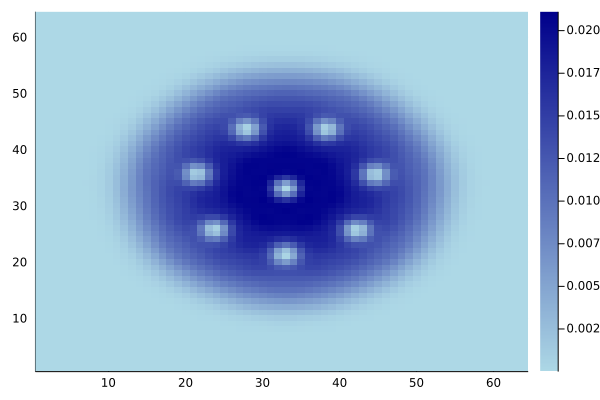

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)